In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

In [6]:
# Add new features for prediction use
# wine_type: red or white
# quality_label: low, medium or high

# Merge two datasets as one

white_wine = pd.read_csv('data/winequality-white.csv', sep = ';')
red_wine = pd.read_csv('data/winequality-red.csv', sep = ';')

red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
                                           categories = ['low', 'medium', 'high'])

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
                                             categories = ['low', 'medium', 'high'])

# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac = 1, random_state = 42).reset_index(drop = True)

'''
Our objective in future sections would be to predict wine_type and quality_label 
'''

'\nOur objective in future sections would be to predict wine_type and quality_label \n'

In [7]:
print(white_wine.shape, red_wine.shape)
print(wines.info())

(4898, 14) (1599, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
wine_type               6497 non-null object
quality_label           6497 non-null category
dtypes: category(1), float64(11), int64(1), object(1)
memory usage: 666.4+ KB
None


In [9]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [10]:
subset_attributes = ['residual sugar', 'total sulfur dioxide', 
                    'sulphates', 'alcohol', 'volatile acidity', 
                     'quality']

rs = round(red_wine[subset_attributes].describe(), 2)
ws = round(white_wine[subset_attributes].describe(), 2)

pd.concat([rs, ws], 
          axis = 1, 
          keys = ['Red Wine Statistics', 
                  'White Wine Statistics'])

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

Observation:

1) Notice that mean residual sugar and total sulfur dioxide in white wine  are much higher than red wine.

2) While for attributes of sulphates and volatile acidity, red is higher than white

In [11]:
subset_attributes = ['alcohol', 'volatile acidity',
                     'pH', 'quality']

ls = round(wines[wines['quality_label'] == 'low'][subset_attributes].describe(), 2)
ms = round(wines[wines['quality_label'] == 'medium'][subset_attributes].describe(), 2)
hs = round(wines[wines['quality_label'] == 'high'][subset_attributes].describe(), 2)

pd.concat([ls,ms,hs], 
          axis = 1,
          keys = ['Low Quality Wine', 
                  'Medium Quality Wine',
                  'High Quality Wine'])

Low Quality Wine                                    Medium Quality Wine  \
               alcohol volatile acidity       pH  quality             alcohol   
count          2384.00          2384.00  2384.00  2384.00             3915.00   
mean              9.87             0.40     3.21     4.88               10.81   
std               0.84             0.19     0.16     0.36                1.20   
min               8.00             0.10     2.74     3.00                8.40   
25%               9.30             0.26     3.11     5.00                9.80   
50%               9.60             0.34     3.20     5.00               10.80   
75%              10.40             0.50     3.31     5.00               11.70   
max              14.90             1.58     3.90     5.00               14.20   

                                         High Quality Wine                   \
      volatile acidity       pH  quality           alcohol volatile acidity   
count          3915.00  3915.00  3915.00            198.00           198.00   
mean              0.31     3.22     6.28             11.69             0.29   
std               0.14     0.16     0.45              1.27             0.12   
min               0.08     2.72     6.00              8.50             0.12   
25%               0.21     3.11     6.00             11.00             0.21   
50%               0.27     3.21     6.00             12.00             0.28   
75%               0.36     3.33     7.00             12.60             0.35   
max               1.04     4.01     7.00             14.00             0.85   

                       
           pH quality  
count  198.00  198.00  
mean     3.23    8.03  
std      0.16    0.16  
min      2.88    8.00  
25%      3.13    8.00  
50%      3.23    8.00  
75%      3.33    8.00  
max      3.72    9.00

Observation:

1) Mean alcohol levels seem to increase based on the rating of the wine quality.
2) pH levels are almost same for varying quality.
3) Mean volatile acidity levels seem to decrease based on the rating of the wine quality.

##  Inferential Statistics

In [15]:
from scipy import stats

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'],
                      wines[wines['quality_label'] == 'medium']['alcohol'],
                      wines[wines['quality_label'] == 'high']['alcohol'])

print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistics:', F, '\tp-value:', p)

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['pH'],
                      wines[wines['quality_label'] == 'medium']['pH'],
                      wines[wines['quality_label'] == 'high']['pH'])

print('ANOVA test for mean pH levels across wine samples with different quality ratings')
print('F Statistics:', F, '\tp-value:', p)


F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['volatile acidity'],
                      wines[wines['quality_label'] == 'medium']['volatile acidity'],
                      wines[wines['quality_label'] == 'high']['volatile acidity'])

print('ANOVA test for mean volatile acidity levels across wine samples with different quality ratings')
print('F Statistics:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistics: 673.074534723 	p-value: 2.27153374506e-266
ANOVA test for mean pH levels across wine samples with different quality ratings
F Statistics: 1.23638608035 	p-value: 0.290500277977
ANOVA test for mean volatile acidity levels across wine samples with different quality ratings
F Statistics: 250.339144753 	p-value: 1.84722859673e-105


Conclusion:

1) For the first test of alcohol, since p-value is less than 0.05, we reject the null hypothesis.
   In other words, we believe that there is a statistically significant difference in alcohol level means for at least two groups out of the three.

2) For the second test of pH, fail to reject the null hypothesis.
   The pH level means across the three groups are not statistically significantly different.
   
3) For the third test of volatile acidity, since p-value is less than 0.05, we reject the null hypothesis.
   In other words, we believe that there is a statistically significant difference in volatile acidity level means for at least two groups out of the three.

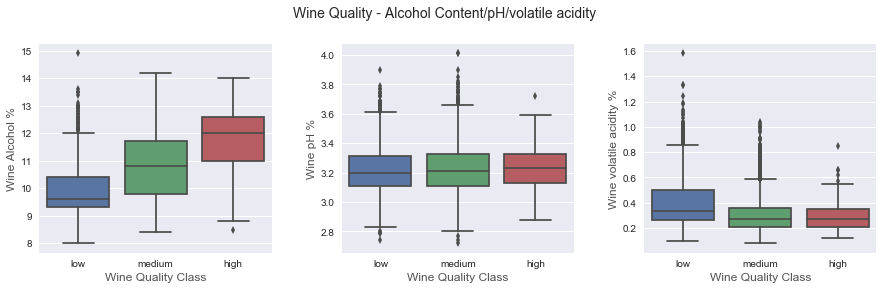

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (15, 4))
f.suptitle('Wine Quality - Alcohol Content/pH/volatile acidity', fontsize=14)
f.subplots_adjust(top = 0.85, wspace = 0.3)

sns.boxplot(x="quality_label", y="alcohol", data = wines, ax = ax1)
ax1.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="pH", data = wines, ax = ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine pH %",size = 12,alpha=0.8)

sns.boxplot(x="quality_label", y="volatile acidity", data = wines, ax = ax3)
ax3.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax3.set_ylabel("Wine volatile acidity %",size = 12,alpha=0.8)

## Univariate Analysis

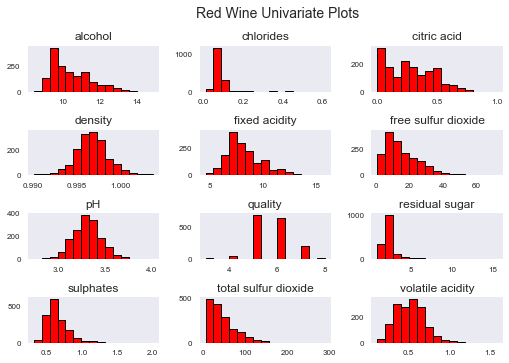

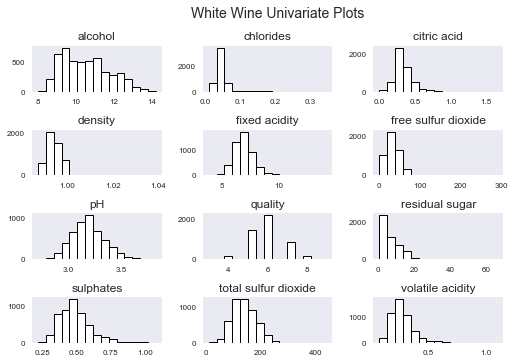

In [18]:
red_wine.hist(bins = 15, color = 'red', edgecolor = 'black',
              linewidth = 1, xlabelsize = 8, ylabelsize = 8,
              grid = False)
plt.tight_layout(rect = (0, 0, 1.2, 1.2))
rt = plt.suptitle('Red Wine Univariate Plots', x = 0.65, y = 1.25, fontsize = 14)

white_wine.hist(bins = 15, color = 'white', edgecolor = 'black',
              linewidth = 1, xlabelsize = 8, ylabelsize = 8,
              grid = False)
plt.tight_layout(rect = (0, 0, 1.2, 1.2))
wt = plt.suptitle('White Wine Univariate Plots', x = 0.65, y = 1.25, fontsize = 14)

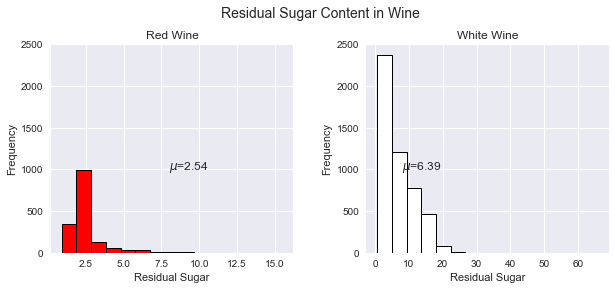

In [25]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle('Residual Sugar Content in Wine', fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Red Wine')
ax1.set_xlabel('Residual Sugar')
ax1.set_ylabel('Frequency')
ax1.set_ylim([0, 2500])
ax1.text(8, 1000, r'$\mu$='+str(round(red_wine['residual sugar'].mean(),2)), fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['residual sugar'],
                                     color = 'red',
                                     bins = 15,
                                     edgecolor = 'black',
                                     linewidth = 1)


ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('White Wine')
ax2.set_xlabel('Residual Sugar')
ax2.set_ylabel('Frequency')
ax2.set_ylim([0, 2500])
ax2.text(8, 1000, r'$\mu$='+str(round(white_wine['residual sugar'].mean(),2)), fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['residual sugar'],
                                     color = 'white',
                                     bins = 15,
                                     edgecolor = 'black',
                                     linewidth = 1)

Observation:

Residual sugar content in white wine samples seems to be more as compared to red wine samples. 

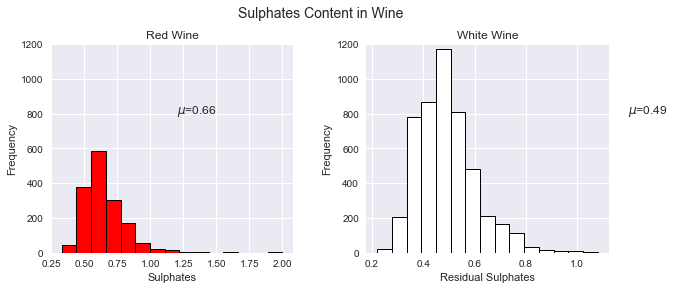

In [28]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle('Sulphates Content in Wine', fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Red Wine')
ax1.set_xlabel('Sulphates')
ax1.set_ylabel('Frequency')
ax1.set_ylim([0, 1200])
ax1.text(1.2, 800, r'$\mu$='+str(round(red_wine['sulphates'].mean(),2)), fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['sulphates'],
                                     color = 'red',
                                     bins = 15,
                                     edgecolor = 'black',
                                     linewidth = 1)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('White Wine')
ax2.set_xlabel('Residual Sulphates')
ax2.set_ylabel('Frequency')
ax2.set_ylim([0, 1200])
ax2.text(1.2, 800, r'$\mu$='+str(round(white_wine['sulphates'].mean(),2)), fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['sulphates'],
                                     color = 'white',
                                     bins = 15,
                                     edgecolor = 'black',
                                     linewidth = 1)

 Observation:
        
sulphate content is slgihtly more in red wine samples as compared to white wine samples

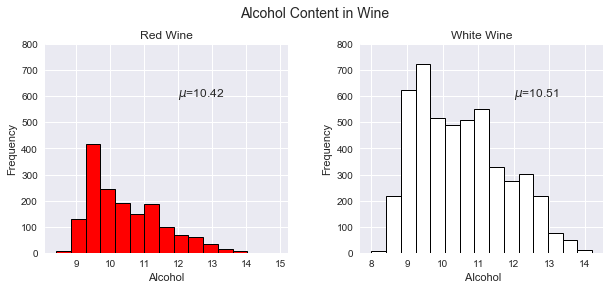

In [30]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle('Alcohol Content in Wine', fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Red Wine')
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Frequency')
ax1.set_ylim([0, 800])
ax1.text(12, 600, r'$\mu$='+str(round(red_wine['alcohol'].mean(),2)), fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['alcohol'],
                                     color = 'red',
                                     bins = 15,
                                     edgecolor = 'black',
                                     linewidth = 1)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('White Wine')
ax2.set_xlabel(' Alcohol')
ax2.set_ylabel('Frequency')
ax2.set_ylim([0, 800])
ax2.text(12, 600, r'$\mu$='+str(round(white_wine['alcohol'].mean(),2)), fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['alcohol'],
                                     color = 'white',
                                     bins = 15,
                                     edgecolor = 'black',
                                     linewidth = 1)

Observation:

Alcohol content is almost similar in both types on an average

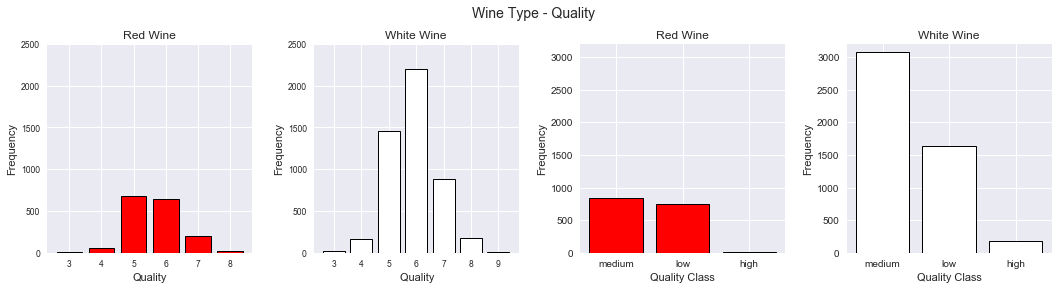

In [32]:
fig = plt.figure(figsize = (18, 4))
title = fig.suptitle('Wine Type - Quality', fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax1 = fig.add_subplot(1, 4, 1)
ax1.set_title('Red Wine')
ax1.set_xlabel('Quality')
ax1.set_ylabel('Frequency')
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red', 
               edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1, 4, 2)
ax2.set_title('White Wine')
ax2.set_xlabel(' Quality')
ax2.set_ylabel('Frequency')
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white', 
               edgecolor='black', linewidth=1)

ax3 = fig.add_subplot(1, 4, 3)
ax3.set_title("Red Wine")
ax3.set_xlabel("Quality Class")
ax3.set_ylabel("Frequency") 
rw_q = red_wine['quality_label'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax3.set_ylim([0, 3200])
bar3 = ax3.bar(list(range(len(rw_q[0]))), rw_q[1], color='red', 
        edgecolor='black', linewidth=1, tick_label =rw_q[0])

ax4 = fig.add_subplot(1, 4, 4)
ax4.set_title("White Wine")
ax4.set_xlabel("Quality Class")
ax4.set_ylabel("Frequency") 
ww_q = white_wine['quality_label'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax4.set_ylim([0, 3200])
bar4 = ax4.bar(list(range(len(ww_q[0]))), ww_q[1], color='white', 
        edgecolor='black', linewidth=1, tick_label =ww_q[0])

## Multivariate Analysis

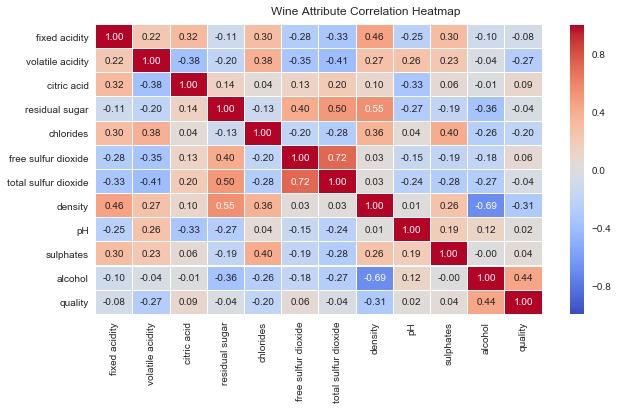

In [33]:
'''
Correlation Map
'''

f, ax = plt.subplots(figsize = (10, 5))
corr = wines.corr()
hm = sns.heatmap(round(corr, 2), 
                 annot = True, 
                 ax = ax, 
                 cmap = "coolwarm", 
                 fmt = '.2f', 
                 linewidths = .05)
f.subplots_adjust(top = 0.93)
t = f.suptitle("Wine Attribute Correlation Heatmap", fontsize = 12)


Observation:
    
1) A string negative correlation between density and alcohol

2) A strong positive correlation between total and free sulfur dioxide

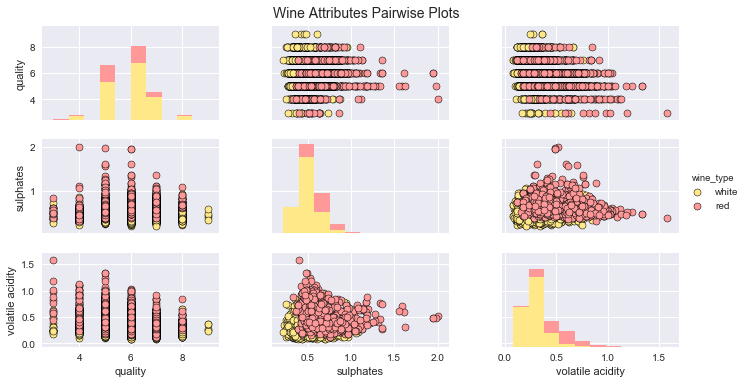

In [36]:
'''
Pairwise plot
'''

cols = ['wine_type', 'quality', 'sulphates', 'volatile acidity']

pp = sns.pairplot(wines[cols], hue = 'wine_type',
                  size = 1.8, aspect = 1.8,
                  palette = {'red': '#FF9999', 'white' : '#FFE888'},
                  plot_kws = dict(edgecolor = 'black', 
                                  linewidth = 0.5))
fig = pp.fig
fig.subplots_adjust(top = 0.93, wspace = 0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize = 14)

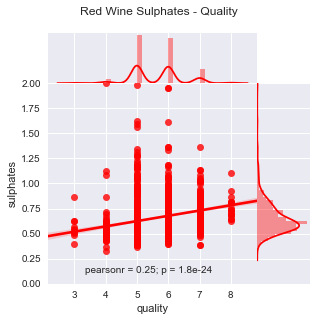

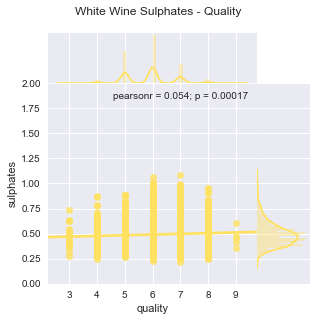

In [39]:
'''
Joint plot of 3 features [type, quality, sulphates]
'''
rj = sns.jointplot(x = 'quality', y = 'sulphates', 
                   data = red_wine, 
                   kind = 'reg',
                   ylim = (0, 2), 
                   color = 'red',
                   space = 0, size = 4.5, ratio = 4)
rj.ax_joint.set_xticks(list(range(3,9)))
fig = rj.fig
fig.subplots_adjust(top = 0.9)
t = fig.suptitle('Red Wine Sulphates - Quality', fontsize = 12)

wj = sns.jointplot(x = 'quality', y = 'sulphates', 
                   data = white_wine, 
                   kind = 'reg',
                   ylim = (0, 2), 
                   color = '#ffe160',
                   space = 0, size = 4.5, ratio = 4)
wj.ax_joint.set_xticks(list(range(3,10)))
fig = wj.fig
fig.subplots_adjust(top = 0.9)
t = fig.suptitle('White Wine Sulphates - Quality', fontsize = 12)



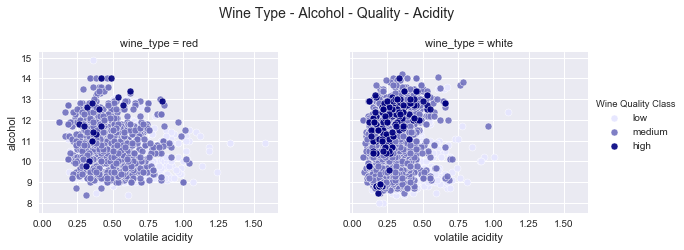

In [41]:
'''
Joint analysis of 2+ variables

[Wine Type, Alcohol, Quality, Acidity']
'''

g = sns.FacetGrid(wines, 
                  col = 'wine_type', 
                  hue = 'quality_label',
                  col_order = ['red', 'white'],
                  hue_order = ['low', 'medium', 'high'],
                  aspect = 1.2, size = 3.5,
                  palette = sns.light_palette('navy', 3))

g.map(plt.scatter, 'volatile acidity', 'alcohol', 
      alpha = 0.9, edgecolor = 'white', linewidth = 0.5)

fig = g.fig
fig.subplots_adjust(top = 0.8, wspace = 0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize = 14)
l = g.add_legend(title = 'Wine Quality Class')


Observation:

1) Higher quality wine samples (depicted by darker shades) have lower levels of volatile acidity and higher levels of alcohol content as compared to wine samples with medium and low ratings. 

2) volatile acidity levels are slightly lower in white wine samples as compared to red wine samples.

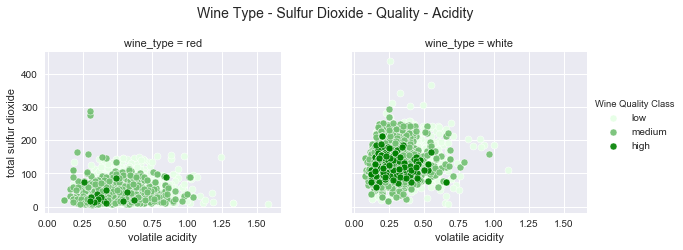

In [42]:
'''
Joint analysis of 2+ variables

[Wine Type, Sulfur Dioxide, Quality, Acidity']
'''

g = sns.FacetGrid(wines, 
                  col = 'wine_type', 
                  hue = 'quality_label',
                  col_order = ['red', 'white'],
                  hue_order = ['low', 'medium', 'high'],
                  aspect = 1.2, size = 3.5,
                  palette = sns.light_palette('green', 3))

g.map(plt.scatter, 'volatile acidity', 'total sulfur dioxide', 
      alpha = 0.9, edgecolor = 'white', linewidth = 0.5)

fig = g.fig
fig.subplots_adjust(top = 0.8, wspace = 0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Quality - Acidity', fontsize = 14)
l = g.add_legend(title = 'Wine Quality Class')


Observation:

1) Higher quality wine samples (depicted by darker shades) have lower levels of volatile acidity and lower levels of total sulfur dioxide.

2) total sulfur dioxide is considerable more in white wine samples as compared to red wine samples.

3) volatile acidity levels are slightly lower in white wine samples as compared to red wine samples

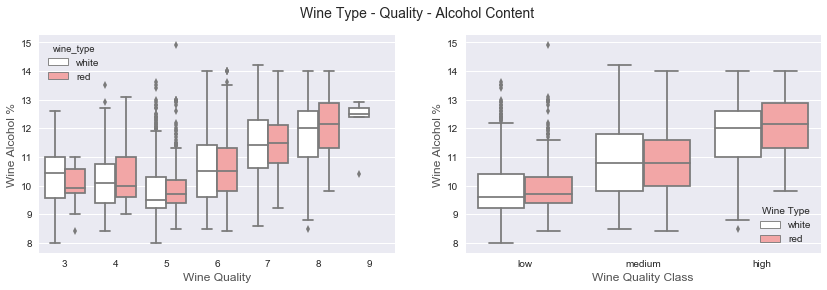

In [43]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize = 14)

sns.boxplot(x = 'quality', y = 'alcohol', hue = 'wine_type',
            data = wines, 
            palette = {"red": "#FF9999", 
                       "white": "white"},
            ax = ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)


sns.boxplot(x = 'quality_label', y = 'alcohol', hue = 'wine_type',
            data = wines, 
            palette = {"red": "#FF9999", 
                       "white": "white"},
            ax = ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)

l = plt.legend(loc = 'best', title = 'Wine Type')

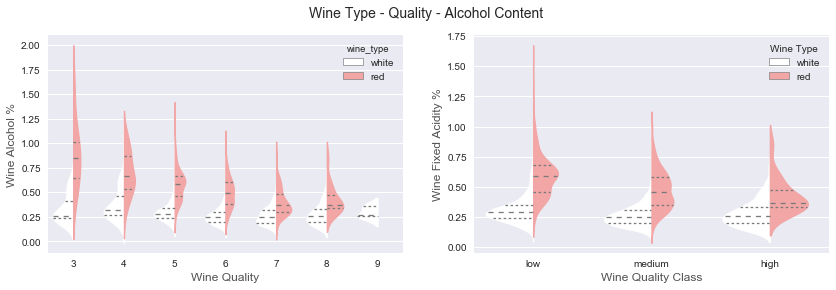

In [46]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
f.suptitle('Wine Type - Quality - Alcohol Content', fontsize = 14)

sns.violinplot(x = 'quality', y = 'volatile acidity', hue = 'wine_type',
               data = wines, 
               split = True,
               inner = 'quart',
               linewidth = 1.3,
               palette = {"red": "#FF9999", 
                          "white": "white"},
               ax = ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)


sns.violinplot(x = 'quality_label', y = 'volatile acidity', hue = 'wine_type',
               data = wines, 
               split = True,
               inner = 'quart',
               linewidth = 1.3,
               palette = {"red": "#FF9999", 
                       "white": "white"},
               ax = ax2)
ax2.set_xlabel("Wine Quality Class",size = 12,alpha=0.8)
ax2.set_ylabel("Wine Fixed Acidity %",size = 12,alpha=0.8)

l = plt.legend(loc = 'upper right', title = 'Wine Type')